# PROBLEM1

Calculating & Plotting the number density of CMB photons with energy greater than 13.6eV

/var/folders/zt/dglqbnr11k14zxc4_qprjbcw0000gn/T/ipykernel_24330/2520732502.py:8: RuntimeWarning: overflow encountered in exp
  return ((x/(1+z))**2/(np.exp(x/(1+z))-1))


1.2831582472270355e+27
9.984418247354564e+25
6.633386684183018e+23


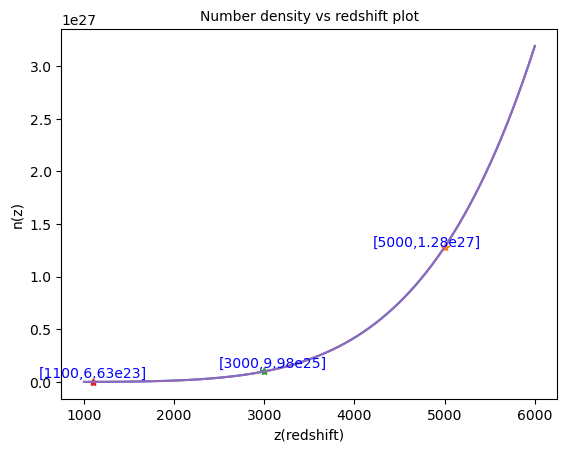

In [43]:
import numpy as np 
import pylab as pl
from scipy.integrate import quad 
#DEFINE PARAMETERS
h=6.626*1e-34/(2*np.pi);c=3*10**8;k=1.381e-23;T0=2.7255

def Integrand(x,z):
    return ((x/(1+z))**2/(np.exp(x/(1+z))-1))
#57154/(1+z)
def n(z):
    int,errpr=quad(Integrand ,57154/(1+z),np.inf, args=(z,))
    return int*(k*T0*(1+z))**3*(1+z)/(np.pi**2*h**3*c**3)
print(n(5000))
print(n(3000))
print(n(1100))
z=np.linspace(1000,6000,1000)
A=[]
for i in range(len(z)):
    A.append(n(z[i]))
pl.plot(z,A)

pl.plot(5000,n(5000),'*')
pl.plot(3000,n(3000),'*')
pl.plot(1100,n(1100),'*')
pl.text(4200,n(5000),'[5000,1.28e27]',color='b')
pl.text(2500,n(3200),'[3000,9.98e25]',color='b')
pl.text(500,n(2500),'[1100,6.63e23]',color='b')
pl.plot(z, A)
pl.xlabel("z(redshift)",size=10,color='k')
pl.ylabel("n(z)",size=10,color='k')
pl.title("Number density vs redshift plot",size=10,color='k')
plt.savefig('prob1.png')
pl.show()

# PROBLEM2 

Calculating and Plotting the ionization fraction of electrons as a function of redshift

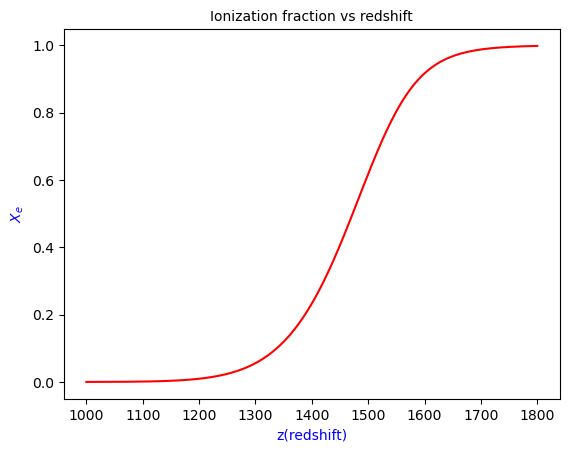

In [44]:
import numpy as np 
import pylab as pl 
def b(z):
    return 10**(9)*(216229906/(1+z))**1.5*np.exp(-57854.032/(1+z))
z=np.linspace(1000,1800,1000)
A=[]
for i in range(len(z)):
    a = 1
    B = b(z[i])
    c = -B
    discriminant = B**2 - 4*a*c
    # Calculate the roots
    root1 = (-B + np.sqrt(discriminant)) / (2*a)
    root2 = (-B - np.sqrt(discriminant)) / (2*a)
    A.append(root1)
pl.plot(z,A,color='r')
pl.xlabel("z(redshift)",color='b',size=10)
pl.ylabel(r'$X_e$',color='b',size=10)
pl.title("Ionization fraction vs redshift",color='k',size=10)
plt.savefig('')
pl.show()

# Problem 4

Calculating the sound horizon during the recombination for different values of baryon densities

In [19]:
import scipy as scipy
import numpy as np

# Defining the parameters

Ob = 0.05
Og = 9e-5
Ol=0.7
Om = 0.3
z= np.linspace(1100,5000,100)
cost=4.43*1e+3



def H(z):
    return np.sqrt(Om*(1 + z)**3 + Og*(1+z)**4 +Ol)

def cs(z,Ob,Og):
    return 1/(np.sqrt(3*(1 + ((3/4)*Ob/Og)*(1 + z)**(-1))))


def integrate(z,Ob,Og):
    return cost*cs(z,Ob,Og)/H(z)

Ob_list = [Ob, Ob*2, Ob/4]
for i, Ob_val in enumerate(Ob_list):
    rs = scipy.integrate.quad(integrate,1100,np.inf,args=(Ob_val,Og))[0]
    print(f"Sound horizon size(Mpc) for {2**i} times baryon density = ", rs)


Sound horizon size(Mpc) for 1 times baryon density =  151.19323132964846
Sound horizon size(Mpc) for 2 times baryon density =  142.32909049856454
Sound horizon size(Mpc) for 4 times baryon density =  159.59604885313078


# Problem 5

Calculating value of angular diameter distance and sound horizon for the modified parameters, H0=50 km/s/Mpc , Ob=0.06

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define cosmological parameters
H0 = 50 # Hubble constant in km/s/Mpc
omega_m = 0.3 # Matter density parameter
omega_l = 0.7 # Dark energy density parameter
c=3*10**5
# Define the redshift range
z = np.linspace(0, 1100, 10000)

# comoving distance for flat Lambda CDM
def comoving_distance(z):
    return c/H0*(quad(lambda z:1 / np.sqrt(omega_m*(1+z)**3 + omega_l) ,0,z)[0])

def angular_diameter_distance(z):
    return comoving_distance(z)/(1+z)

#print("Comovingdistance (Mpc) at z=1100 =    ", comoving_distance(1100))
print("Angular Diameter distance (Mpc) at z=1100 =    ", angular_diameter_distance(1100))

Angular Diameter distance (Mpc) at z=1100 =     17.41160469573988


In [75]:
import scipy as scipy
import numpy as np

# Defining the parameters

Ob = 0.06  # Ob is increased by 20%
Og = 9e-5
Ol=0.7
Om = 0.3
z= np.linspace(1100,5000,100)
cost=4.43e+3



def H(z):
    return np.sqrt(Om*(1 + z)**3 + Og*(1+z)**4 +Ol)

def cs(z,Ob,Og):
    return 1/(np.sqrt(3*(1 + ((3/4)*Ob/Og)*(1 + z)**(-1))))


def integrate(z,Ob,Og):
    return cost*cs(z,Ob,Og)/H(z)

rs = scipy.integrate.quad(integrate,1100,np.inf,args=(Ob,Og))[0]
print(f"Sound horizon size(Mpc)  = ", rs)


Sound horizon size(Mpc)  =  149.23990908025684


In [56]:
t=rs/DA

In [57]:
print('l=  ',np.pi/t)

l=   0.19239883351153966


In [51]:
import numpy as np

c = 299792.458  # speed of light in km/s
H0 = 70.0  # Hubble constant in km/s/Mpc
Om = 0.3  # matter density parameter
Or = 8.24e-5  # radiation density parameter
Ol=0.7
z = 1100  # redshift

# Integrand function for the comoving distance
def integrand(z):
    return 1 / np.sqrt(Om*(1+z)**3 + Or*(1+z)**4 + Ol)

# Comoving distance
r, _ = quad(integrand, 0, z, epsrel=1e-8)
r *= c / H0

# Angular diameter distance
DA = r / (1+z)

print(f"Angular diameter distance at z={z}: {DA:.3f} Mpc")


Angular diameter distance at z=1100: 12.370 Mpc
